In [1]:
import os
import sys 
import glob
import dask
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

import cmcrameri.cm as cmc
import drama.utils as drtls
from drama.performance.sar.antenna_patterns import sinc_bp, phased_array

from dataclasses import dataclass
from typing import Callable, Union, List, Dict, Any
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class
from leakage.misc import round_to_hour, angular_difference, calculate_distance

In [25]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"

# scenarios = [
#     'Aghulas_20200309',
#     'Aghulas_20200321',
#     'Aghulas_20200402',
#     'Aghulas_20200414',
#     'Aghulas_20200426'
#     ]

scenarios = [
    # # 'Aghulas_20200203',
    # 'Aghulas_20200215',
    'Aghulas_20200227',
    'Aghulas_20200310',
    # 'Aghulas_20200322',
    # 'Aghulas_20200403',
    'Aghulas_20200415',
    # 'Aghulas_20200427',
]

In [41]:
# noises = []
# signals = []
results = []
for i, scenario in enumerate(scenarios):
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=50_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=150,
        antenna_length=2.87,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42 + i, # NOTE random state changes per scene
        fill_nan_limit = 5,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        # _speckle_noise= True
        )
    test.apply()

    data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
    files_dca = glob.glob(f"{data_dir_dca+scenario}/*.nc")
    
    add_dca_to_leakage_class(test, files_dca=files_dca)
    results.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:512: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200215/7D80_9061_A3F0_F5E9_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200215h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200227/AB12_C338_CC42_FD2F_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200227h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200310/432C_5968_914A_E7BA_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200310h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200322/53A3_CF10_DAC5_E02D_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200322h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200403/09A3_9D36_A648_D652_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200403h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200415/1AAE_53C5_7B19_DDF6_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200415h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200427/02F0_278B_ABCD_EC97_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200427h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

In [42]:
func_rmse = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)).values*1, rounding)
func_rmse_xr = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)), rounding)

In [43]:
samples = results #results[:3] + [results[-1]] # results

residuals = [result.data.V_leakage_pulse_rg_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]
backscatters = [result.data.nrcs_scat for result in samples]
signals = [result.data.V_dca_pulse_rg_subscene for result in samples]
currents =  [result.data.V_dca_pulse_rg_subscene - result.data.V_wb_pulse_rg_subscene for result in samples]
noise = [result.data.V_sigma_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]

In [44]:
ds_residual = xr.concat(residuals, dim = 'time')#.sel(slow_time = slice(0, 350E3))#.T.plot(robust = True, cmap = cmc.vik)
ds_currents = xr.concat(currents, dim = 'time')#.T.plot(robust = True, cmap = cmc.vik)
ds_nrcs = xr.concat(backscatters, dim = 'time')#.sel(slow_time = slice(0, 350E3))
ds_noise = xr.concat(noise, dim = 'time')#.sel(slow_time = slice(0, 350E3))

clip_1 = ds_currents/ds_currents
clip_2 = ds_residual/ds_residual

ds_residual = ds_residual * clip_1
ds_currents = ds_currents * clip_2
ds_noise = ds_noise * clip_2 * clip_1

ds_residual_mean = ds_residual.mean(dim = 'time')
ds_residual_std = ds_residual.std(dim = 'time')
ds_noise_mean = ds_noise.mean(dim = 'time')
ds_currents_mean = ds_currents.mean(dim = 'time')

print('leakage:', func_rmse(ds_residual_mean), ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')
print('noise:', func_rmse(ds_noise_mean), ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')
print('signal:', func_rmse(ds_currents_mean), ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')

leakage: 0.223 [0.678 0.665 0.571 0.482 0.497 0.65  0.54 ] 

noise: 0.89 [1.95  2.345 2.216 2.101 2.113 2.448 2.313] 

signal: 0.417 [0.568 0.443 0.519 0.479 0.519 0.574 0.62 ] 



In [45]:
# complete correlation
(np.mean(ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values)) 

(0.5832857142857143, 2.212285714285714, 0.5317142857142857)

In [46]:
# complete uncorrelated
(np.mean(ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values))  / np.sqrt(len(samples)) 

array([0.22046128, 0.8361654 , 0.20096911])

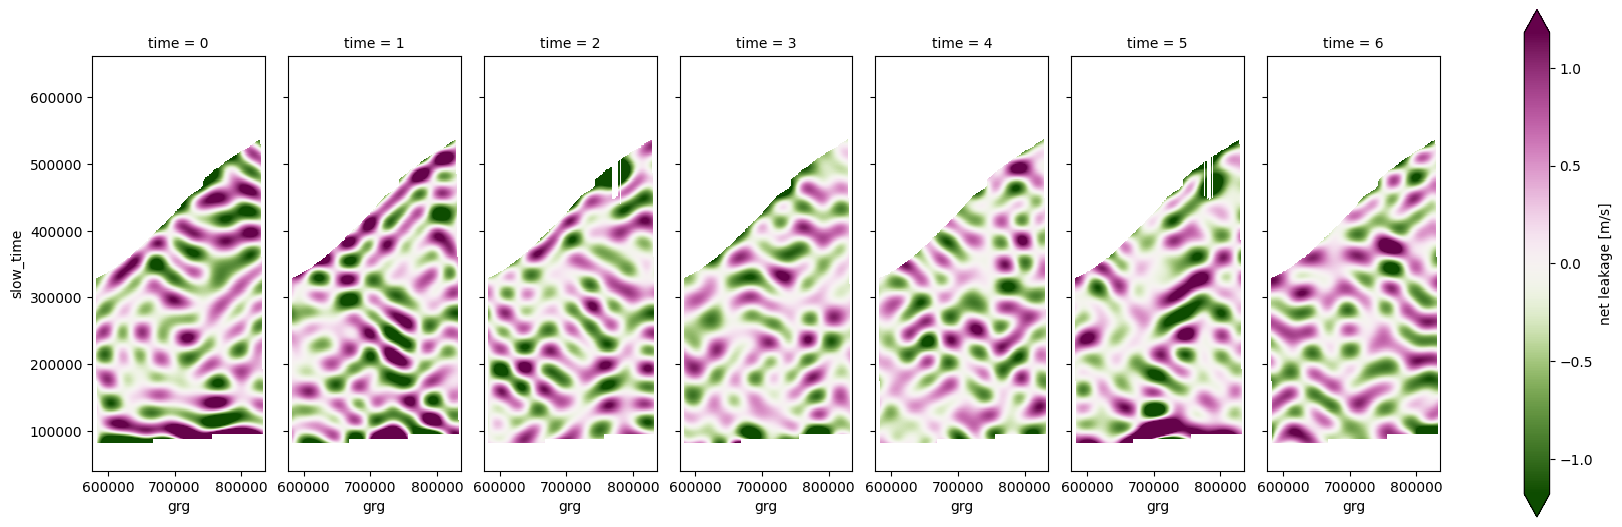

In [47]:
a = ds_residual.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.bam_r, figsize = (18,6), cbar_kwargs = {'label':'net leakage [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

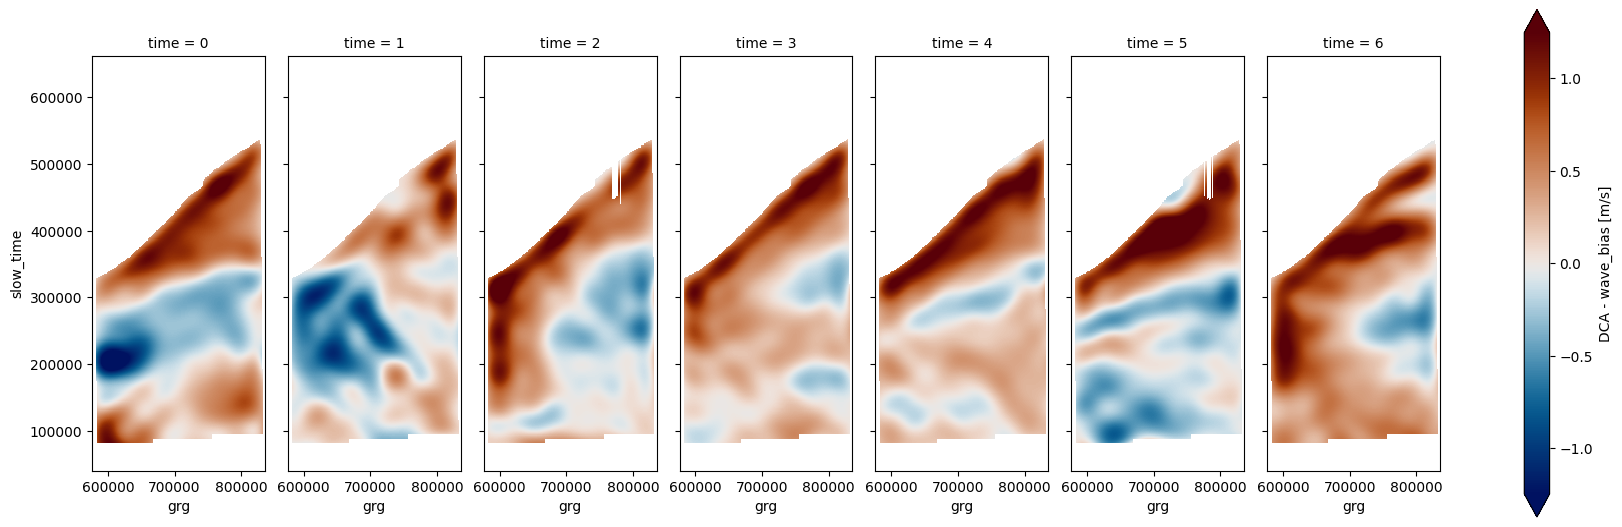

In [48]:
a = ds_currents.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.vik, figsize = (18,6), cbar_kwargs = {'label':'DCA - wave_bias [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

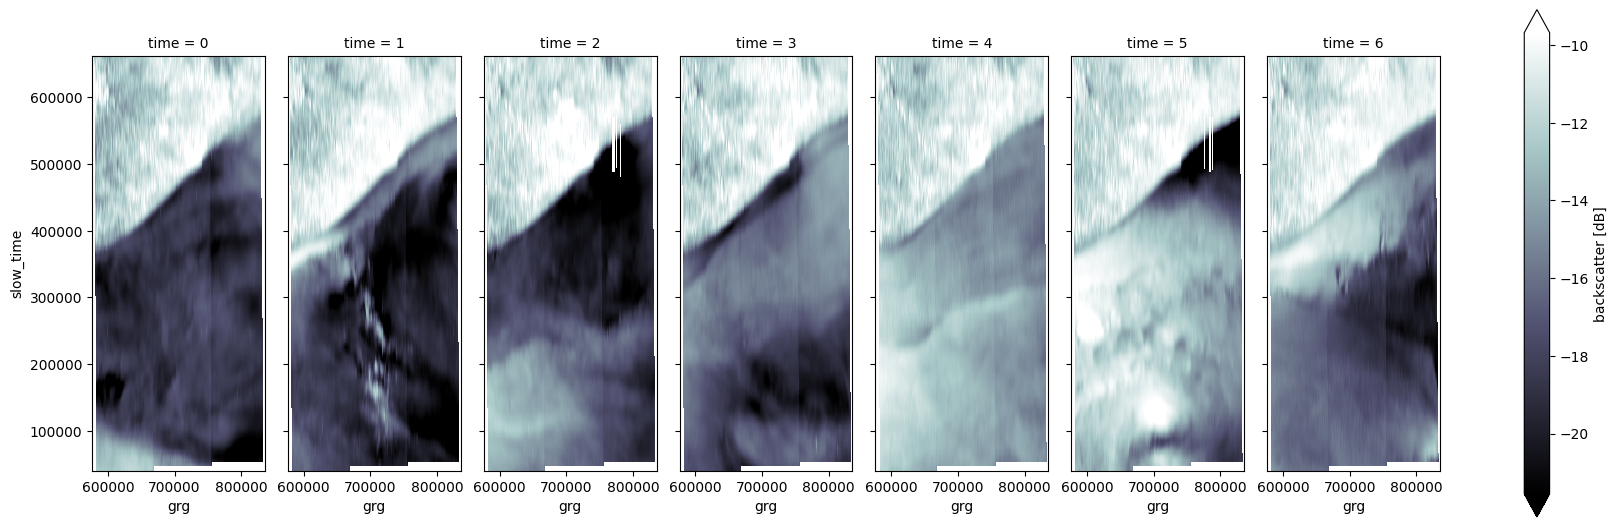

In [49]:
a = (10*np.log10(ds_nrcs)).plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = 'bone', figsize = (18,6), cbar_kwargs = {'label':'backscatter [dB]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

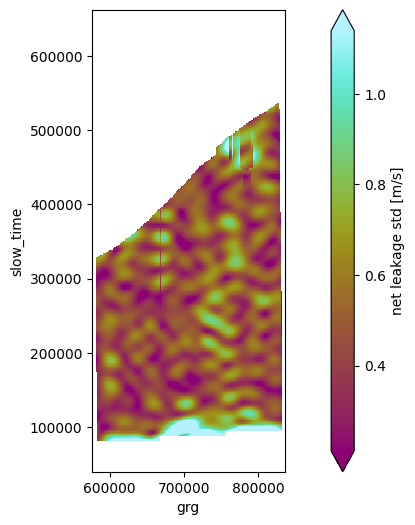

In [35]:
a = ds_residual_std.T.plot(robust = True, cmap = cmc.hawaii, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

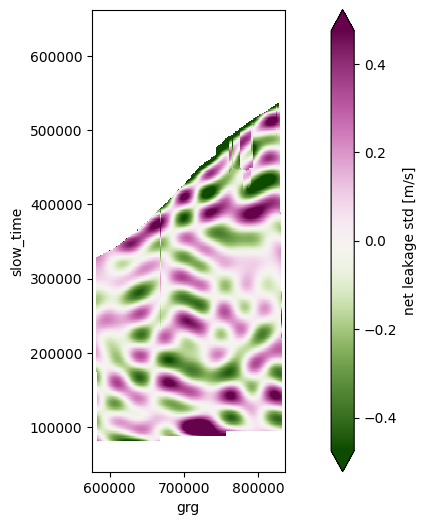

In [36]:
a = ds_residual_mean.T.plot(robust = True, cmap = cmc.bam_r, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

In [50]:
def signal_2_noise_ratio(signal, noise):
    return signal**2 / noise**2

def to_decibel(x):
    return 10*np.log10(x)

def from_decibel(x):
    return 10**(x/10)

In [51]:
snr = to_decibel(signal_2_noise_ratio(signal=ds_currents, noise=ds_residual))

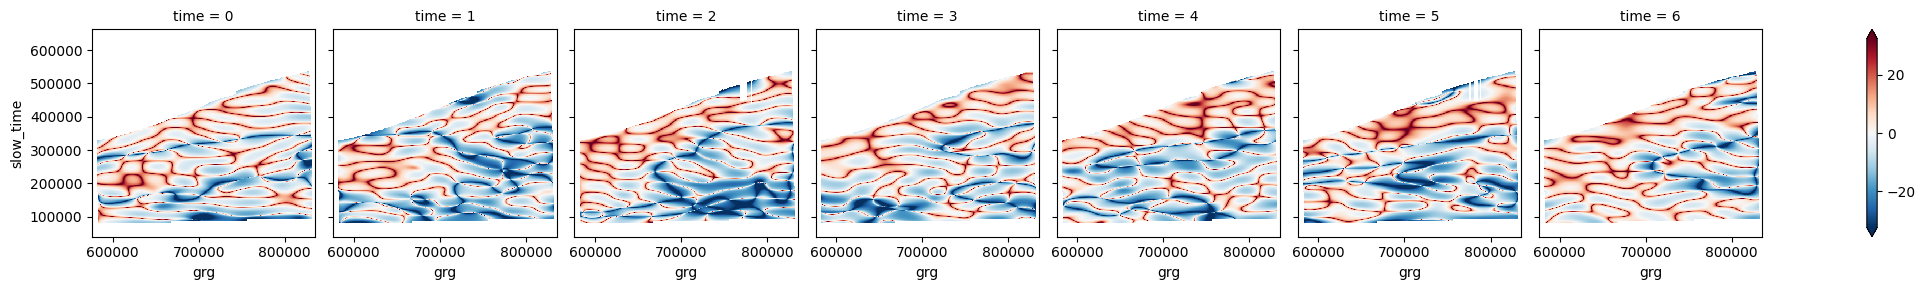

In [52]:
snr.plot(x = 'grg', y='slow_time', col = 'time', robust = True)

individual SNR -0.4452655281414584 12.864684602659867
individual SNR -4.1114761992955495 14.034076240516617
individual SNR -2.7374203027593524 15.478585384405136
individual SNR -0.9846174219788294 13.643390839785212
individual SNR -1.2977344839670606 13.97417185869974
individual SNR -1.0334566359335182 14.959657601212083
individual SNR 1.9569069941922235 12.602508215983601
average SNR -1.2350124494788326 14.076741062276755
SNR of averaged 2.26477215335061 14.83621310143522


Text(0, 0.5, 'Relative occurence')

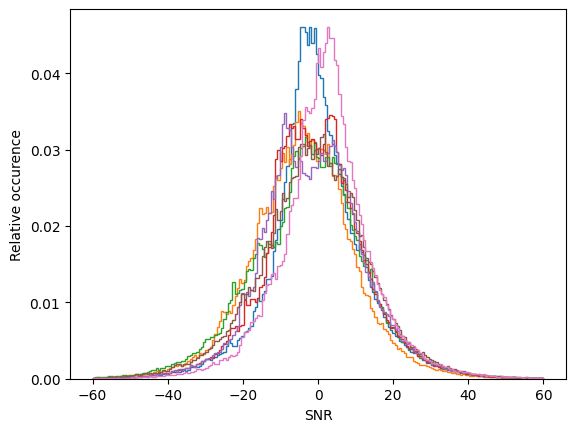

In [60]:
plt.figure()
for i in range(snr.sizes['time']):
    _ = snr.isel(time = i).plot.hist(bins = 200, range = (-60, 60), alpha = 1, density = True, histtype = 'step')
    print('individual SNR', np.nanmean(snr.isel(time = i)), np.nanstd(snr.isel(time = i)))
# plt.title('Signal to noise distribution')
print('average SNR', np.nanmean(snr), np.nanstd(snr))

snr_of_mean = to_decibel(signal_2_noise_ratio(signal=ds_currents_mean, noise=ds_residual_mean))
print('SNR of averaged', np.nanmean(snr_of_mean), np.nanstd(snr_of_mean))
plt.xlabel('SNR')
plt.ylabel('Relative occurence')